In [17]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import LongTraceSimulator
import matplotlib.pyplot as plt
import DELightStyle
plt.rcParams['font.family'] = 'DejaVu Sans'  # Matplotlib's default font

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict
def plot_qp_traces_offset_clean(traces, fs=3_906_250, offset_step=70, title="QP Traces"):
    """
    Cleanly plots all QP traces with vertical offset and time in milliseconds,
    using DELight annotations and styling.

    Parameters:
    -----------
    traces : array-like, shape (43, N) or (1, 43, N)
        Array of raw traces from multiple channels.
    fs : float
        Sampling frequency in Hz (default: 3.90625 MHz).
    offset_step : float
        Vertical offset between channels.
    title : str
        Title for the plot.
    """
    # Unwrap singleton batch if needed
    if traces.shape[0] == 1:
        traces = traces[0]

    num_channels, num_samples = traces.shape
    time_ms = np.arange(num_samples) / fs * 1000  # Time in ms

    fig, ax = plt.subplots(figsize=(24, 24))

    for i in range(num_channels):
        color = 'orange' if i > 44 else '#1f77b4'

        ax.plot(time_ms, traces[i] + i * offset_step, lw=0.3, c=color)

    ax.set_xlabel("Time [ms]", fontsize=28)
    ax.set_ylabel("ADC cpounts + offset", fontsize=28)
    ax.set_xlim(0, np.max(time_ms))
    ax.set_ylim(-10, offset_step * (num_channels + 3))
    ax.set_yticks([])
    ax.set_title(title)

    # DELight annotations
    DELightStyle.display_text(ax, r'$\mathbf{DELight}$', x0=0.02, y0=1.02)
    DELightStyle.display_text(ax, "simulation", x0=0.9, y0=1.02)

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # prevent clipping of annotations
    plt.show()
config = read_yaml_to_dict('/home/dwong/DELight_mtr/trigger_study/wk10/config.yaml')
lts = LongTraceSimulator(config)

In [15]:
trace, idx= lts.generate(
            E=7000,
            x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='NR',
            quantize=True,
            phonon_only=False
        )

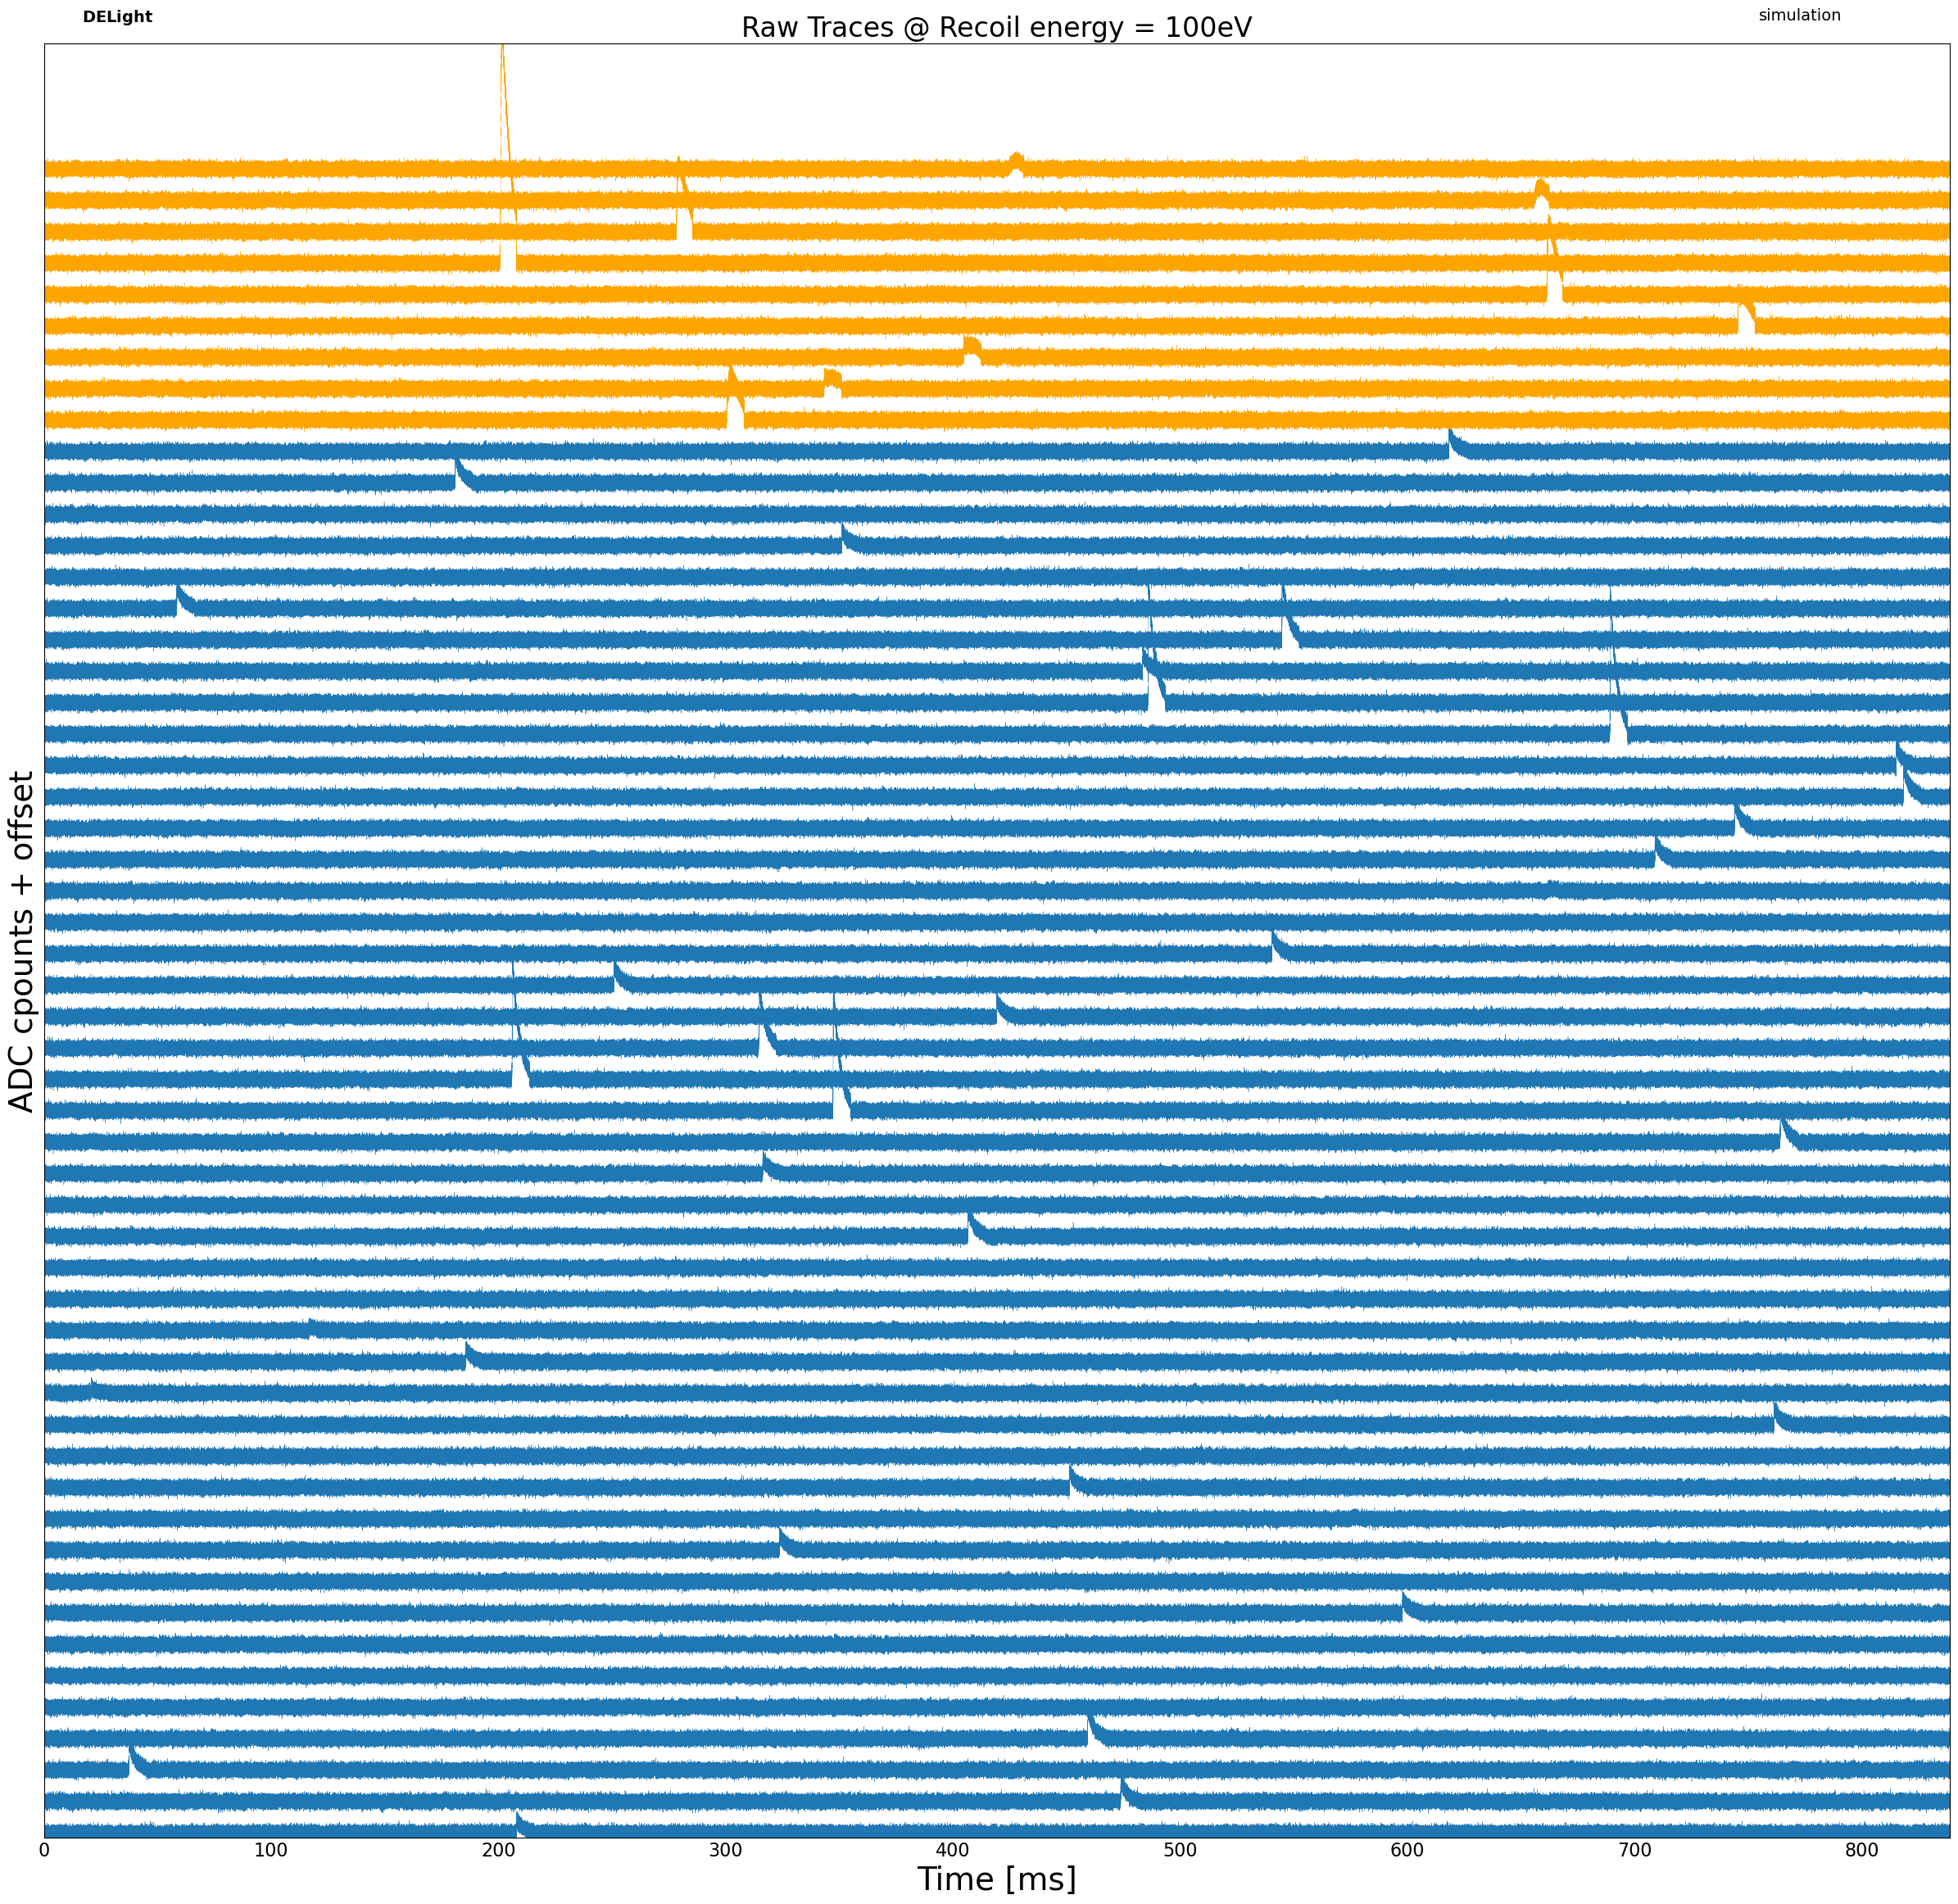

In [18]:
plot_qp_traces_offset_clean(trace[0], title = "Raw Traces @ Recoil energy = 100eV")

In [19]:
idx

array([[ 809453, 1848387,  142995, 1791632, 3029609, 2186025,  975835,
        2332675, 2383195, 1261717, 2244742, 1760188, 1976815, 2971532,
          77894,  721682,  453114,  695211, 3242158, 1585811, 2292518,
        1232859, 2982182, 1353928,  802044, 1226155, 1634965,  976997,
        2108475, 1463539, 2582620, 2766673, 2903559, 3194151, 3181887,
        2689597, 1895572, 1886089, 2125677,  225565, 2354319, 1368865,
         270135,  704384, 2412595, 1170986, 1338430, 1578167, 2909692,
        2578643,  779883, 1082179, 2555268, 1651720]])